# Load the data and libraries.
We start by importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

print("Setup complete.")

Setup complete.


Now we read the Iris data which we can use to exemplify various operations.

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica


<AxesSubplot:xlabel='species', ylabel='count'>

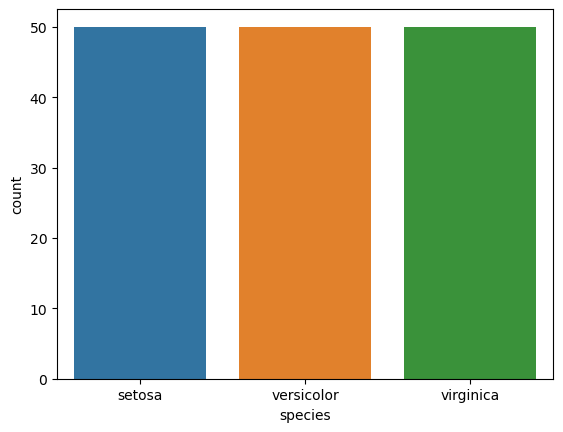

In [2]:
#designate the path where you saved your Iris data
Iris_data_path = "/Users/bli/Desktop/JupiterProjects/JupiterLabs/Datasets/iris.csv"

#Load the data using pandas read_csv function. 
Iris_data = pd.read_csv(Iris_data_path)

print(Iris_data.head())
print(Iris_data.tail())

#Show distribution of the class on whole dataset
sns.countplot(x= 'species', data=Iris_data)

Before we do anything we need to encode the label as a numeric variable as our algorithm, kNN may expect this.   We use the `labelEncoder` for that.  

In [3]:

from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
Iris_data['species']= label_encoder.fit_transform(Iris_data['species']) 
  
Iris_data['species'].unique() 

array([0, 1, 2])

# Designate input and output variables
For the purposes of running models, etc, we often set the target variable as y and the other imput variables as X. We do that next. We then observe the data in X and y.

In [4]:
#Designate the outcome as y
y = Iris_data.species

In [5]:
#Designate the features to become X
iris_features=['sepal_length', 'sepal_width','petal_length','petal_width']
X= Iris_data[iris_features]


In [6]:
X.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
y.describe()

count    150.000000
mean       1.000000
std        0.819232
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: species, dtype: float64

# Sampling the data (train & validation split)

Now, let us do some sampling.  This is necessary before running any machine learning algorithms.  We normally need at least a train and test dataset. Let us divide by train/validation/test to see how we may use the validation set. We won't needed very much here as we will mostly use cross validation and we the file is a bit small for such partitions, but this is just an example as how you may do this in a larger dataset.

We create those with stratification as then we are guaranteed a balance of y labels in each set. We use stratification on the target variable 'species'. We can specify the size of the test/validation set.  The training set size will be the compliment of this. 

In [8]:
from sklearn.model_selection import train_test_split

#Wit stratification to balance the output y
X_train,X_test, y_train, y_test= train_test_split (X,y, test_size=0.2,random_state=1,stratify=y)
X_train,X_val, y_train, y_val= train_test_split (X_train,y_train, test_size=0.2,random_state=1,stratify=y_train)


In [9]:
print("Train data:",X_train.shape)
print("Val data:",X_val.shape)
print("Test data:",X_test.shape)
print("Train data:",y_train.describe())
print("Val data:",y_val.describe())
print("Test data:",y_test.describe())

Train data: (96, 4)
Val data: (24, 4)
Test data: (30, 4)
Train data: count    96.000000
mean      1.000000
std       0.820783
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: species, dtype: float64
Val data: count    24.000000
mean      1.000000
std       0.834058
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: species, dtype: float64
Test data: count    30.000000
mean      1.000000
std       0.830455
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: species, dtype: float64


Let us now visualise the target variable, 'species' in our 3 sets.  We use a subplot for that. 

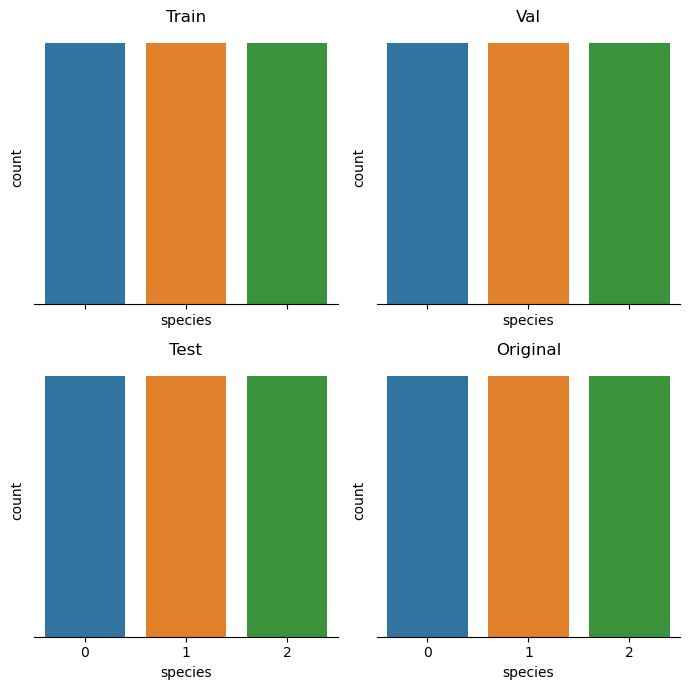

In [10]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)
#Train data
df=y_train.to_frame()
sns.countplot(x='species',data=df,ax=axes[0, 0]).set_title("Train")
#Validation data
df=y_val.to_frame()
sns.countplot(x='species',data=df,ax=axes[0, 1]).set_title("Val")
#Test data
df=y_test.to_frame()
sns.countplot(x='species',data=df,ax=axes[1, 0]).set_title("Test")
#original data
sns.countplot(x='species',data=Iris_data,ax=axes[1, 1]).set_title("Original")
plt.setp(axes, yticks=[])
plt.tight_layout()

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 124 to 42
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  96 non-null     float64
 1   sepal_width   96 non-null     float64
 2   petal_length  96 non-null     float64
 3   petal_width   96 non-null     float64
dtypes: float64(4)
memory usage: 3.8 KB


No we will adapt an example of kNN from https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py as it provides a nice visualisation.  First we apply this to our train data to obtain a classificaiton and we visualise both the decision boundaries and the data points.  This enables us to have some idea of the kind of decision boundary a kNN classifier is providing.  

Note that while plotting the decision function of classifiers for toy 2D datasets can help to get an intuitive understanding of their respective expressive power, be aware that those intuitions don’t always generalize to more realistic high-dimensional problems.

Automatically created module for IPython interactive environment
<class 'numpy.ndarray'>
3.3 8.9
3.3 8.9


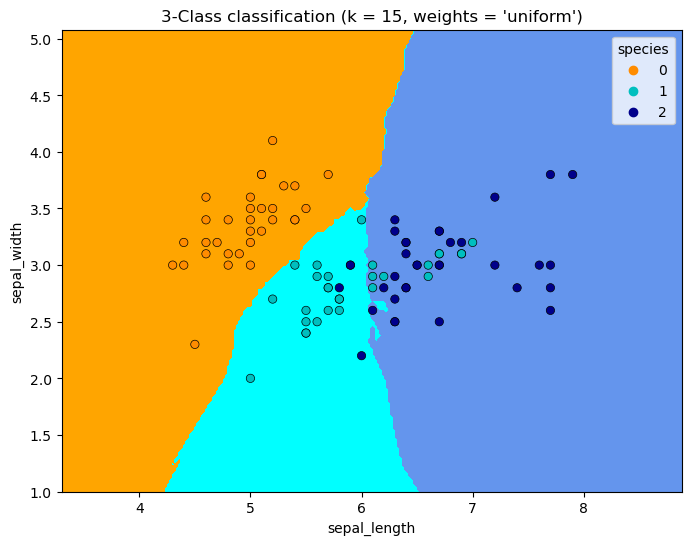

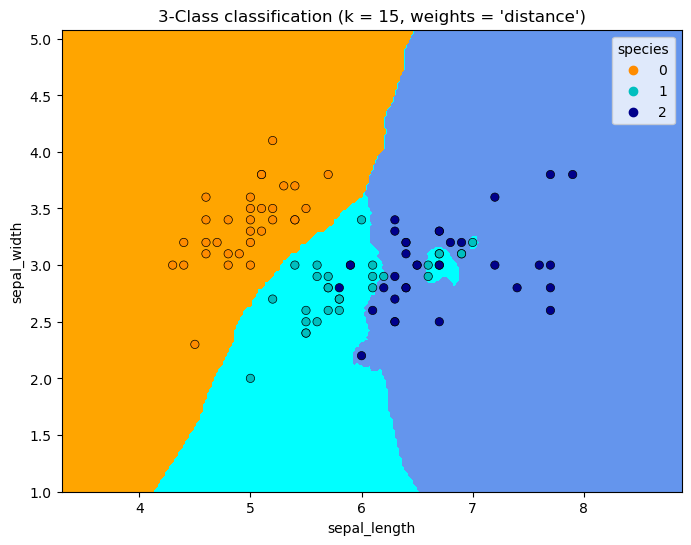

In [12]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = X_train.to_numpy()
X= X[:, :2]
y = y_train
print (type(X))
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    print (x_min, x_max)
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_train,
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel(Iris_data.columns[0])
    plt.ylabel(Iris_data.columns[1])

plt.show()

We can do something similar now by appling this model (not refitting it) to the test data.  So in the code below we only change the plotting of the points for those of the test set. I am keeping the model the same, but redrawing the scatter plot points from the test set.  

Automatically created module for IPython interactive environment


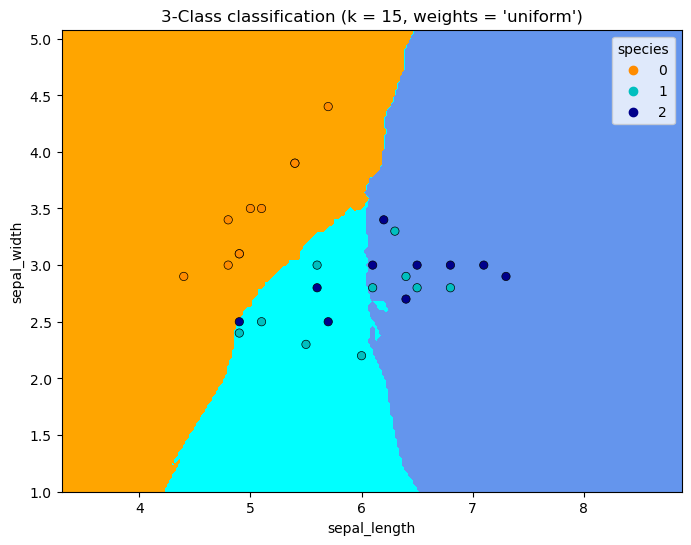

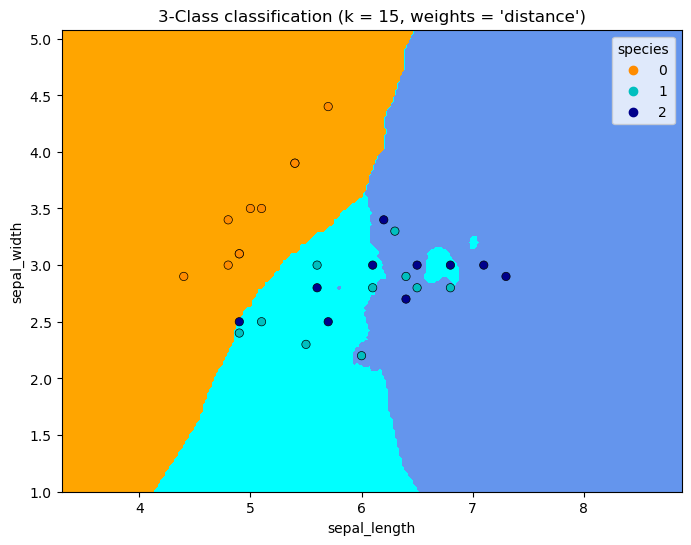

In [13]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# we only take the first two feature from the data to exemplify this 
X = X_train.to_numpy()
X= X[:, :2]
y = y_train

#Make test data also have only first two variables  I am renaming it tX here
#That way I do not change the test data which I will use later with all variables
tX= X_test.to_numpy()
tX=tX[:, :2]

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit training data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the testing points in this instance
    sns.scatterplot(x=tX[:, 0], y=tX[:, 1], hue=y_test,
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel(Iris_data.columns[0])
    plt.ylabel(Iris_data.columns[1])

plt.show()

from sklearn.metrics import accuracy_score



We can look at how accurate the model is by predicting for the test set and calculating accuracy with the `accuracy_score` function. From that we can get a confusion matrix too. 

In [14]:

#Now let us predict for the test set
y_hat = clf.predict(tX)
print(y_hat)

#we can use the built in accuracy metrics in sklearn.
accuracy = accuracy_score(y_test, y_hat)
print(accuracy)

[2 0 1 0 0 0 2 2 1 2 0 1 1 2 1 0 2 1 1 1 2 1 0 0 2 1 0 0 2 2]
0.6666666666666666


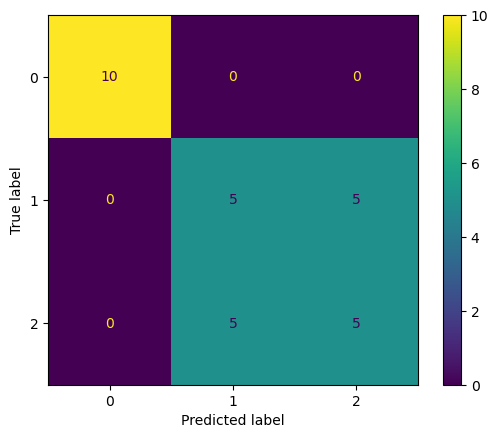

In [15]:
#Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#we can get the confusion matrix
cm = confusion_matrix(y_test, y_hat)

#we can plot it

plot_confusion_matrix(clf,tX, y_test)




Now, I could experiment with another parameter, the number of neighbours `n-neighbours` and we can use the validation set to test the best value of _k_.  So this is an example of how we may use a validation set, although in truth this dataset is a bit small for that!

In [16]:
from sklearn.neighbors import KNeighborsClassifier

accuracies = []
# Test for number of neighbours 1 to 20
for  i in range(1,20):
    #build classifier with our current parameter.
    clf_knn = KNeighborsClassifier(n_neighbors=i,weights='uniform')
          
    #fit our parameterised model to the cross-validated data.
    clf_knn.fit(X_train, y_train)
        
    #obtain predictions on the cv test set.
    y_hat_cv = clf_knn.predict(X_val)


    #append the accuracies to the list of all of them.
    accuracies.append(accuracy_score(y_val, y_hat_cv))
    print('Neighbours:',i, '\ Accuracy:',round(accuracies[i-1],2))
    
#print(accuracies)

# pick the best parameter as the index of the argmax in the accuracies (-1 to account for indexing starting at 0)
#argmax returns the indices of the maximum values along an axis. 
best_paramater = np.argmax(accuracies)+1
print('Best parameter is:',best_paramater)





Neighbours: 1 \ Accuracy: 0.88
Neighbours: 2 \ Accuracy: 0.88
Neighbours: 3 \ Accuracy: 0.92
Neighbours: 4 \ Accuracy: 0.92
Neighbours: 5 \ Accuracy: 0.88
Neighbours: 6 \ Accuracy: 0.83
Neighbours: 7 \ Accuracy: 0.88
Neighbours: 8 \ Accuracy: 0.88
Neighbours: 9 \ Accuracy: 0.92
Neighbours: 10 \ Accuracy: 0.92
Neighbours: 11 \ Accuracy: 0.92
Neighbours: 12 \ Accuracy: 0.92
Neighbours: 13 \ Accuracy: 0.92
Neighbours: 14 \ Accuracy: 0.92
Neighbours: 15 \ Accuracy: 0.92
Neighbours: 16 \ Accuracy: 0.92
Neighbours: 17 \ Accuracy: 0.92
Neighbours: 18 \ Accuracy: 0.88
Neighbours: 19 \ Accuracy: 0.92
Best parameter is: 3


In fact, there are better ways to do this.  Scikit Learn provides the `GridSearchCV` function to perform parameter tunning automatically on a cross-validated sample.  This is probably how we are going to do it.  There are other searches too, apart from grid search but we will leave you to explore those.  More on  https://scikit-learn.org/stable/modules/grid_search.html

In [17]:
#setup your nearest classifier. 
from sklearn.neighbors import KNeighborsClassifier

#Here i create a 2NN classifier
kNN = KNeighborsClassifier(n_neighbors=2)

from sklearn.model_selection import GridSearchCV

#make a dictionary with the parameter we want to set, and the range of values we want to cross-validate over
#in this example I am going to set the k parameter in kNN, where I am testing between 1 to 10
#and others as below
parameters = {
    "n_neighbors" : [1,2,3,4,5,6,7,8,9,10],
    "weights": ['uniform','distance'],
    "algorithm": ['ball_tree','kd_tree','brute'],
    "p":[1,2]
}

clf = GridSearchCV(kNN,param_grid=parameters)
clf.fit(X_train, y_train)

#here we can see the best parameter was for n_neighbors
print(clf.best_params_)

#collect predictions on test data
y_hat = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print("Best parameter Accuracy:",round(accuracy,2))

{'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Best parameter Accuracy: 0.97


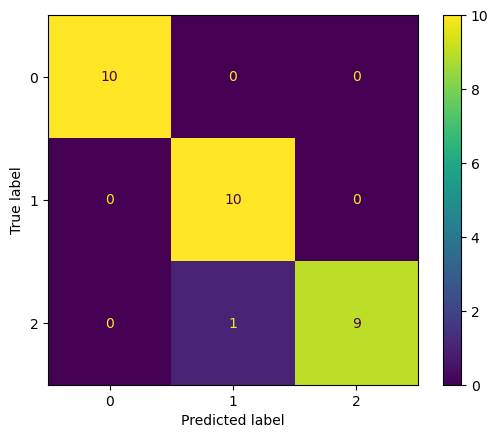

In [18]:
#Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#we can get the confusion matrix
cm = confusion_matrix(y_test, y_hat)

#we can plot it

plot_confusion_matrix(clf,X_test, y_test)



## Multi layer perceptron

Now we build a neural network model to perform the classification.  At first we use the basic model with little parameter tunning. 

In [19]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=1, max_iter=300)
mlp.fit(X_train, y_train)
mlp.predict_proba(X_test[:1])
y_pred =mlp.predict(X_test)
print (y_pred)
mlp.score(X_test, y_test)


[2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 2 0 0 1 1]


1.0

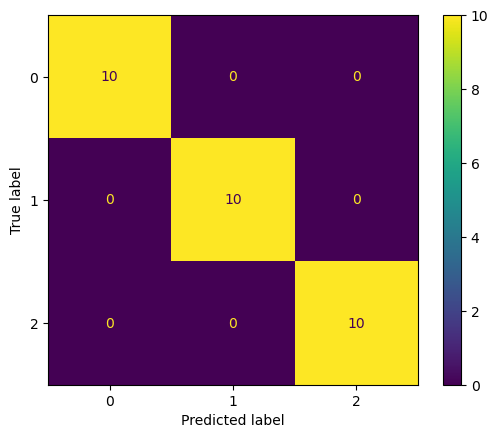

In [20]:
#we can get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#we can plot it

plot_confusion_matrix(mlp,X_test, y_test)



Now we are going to do some hyper parameter tunning on the MLP, just like we did for the kNN model.  As we are getting warnings which may be quite a few if running multimple parameters we can supress the warnings first. 

In [21]:
import warnings
warnings.filterwarnings('ignore') 

Now we use `GridSearchCV` to test a number of parameters in the MLP.  This will enable us to find out the best parameters for this model. 

In [22]:
mlp = MLPClassifier(random_state=1, max_iter=300)

#make a dictionary with the parameter we want to set, and the range of values we want to cross-validate over
#in this example I am going to set hidden layers sizes, activation function, solver, alpha and learning rate.
parameters = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
#the parameter n_jobs is to define how many CPU cores from your computer to use (-1 is for all the cores available).
#The cv is the number of splits for cross-validation.
clf = GridSearchCV(mlp,param_grid=parameters,n_jobs=-1, cv=3,scoring='accuracy')
clf.fit(X_train, y_train)

#here we can see the best parameter was for the MLP
print("Best parameters found:",clf.best_params_)

# In this instance I can also see the result of each cross validation by plotting the accuracy and standard deviation
# As well as the parameters tested in the run
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))


/Users/bli/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/bli/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/bli/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/bli/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/bli/opt/anaconda3/lib/pyt

Best parameters found: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.990 (+/-0.029) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.990 (+/-0.029) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.990 (+/-0.029) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.990 (+/-0.029) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.990 (+/-0.029) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.979 (+/-0.029) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 

I can now look at the predictive power of the best model, and this time, I can use a number of metrics through the 
`classification_report'. 

In [23]:
y_true, y_pred = y_test , clf.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



[2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 2 0 0 1 1]


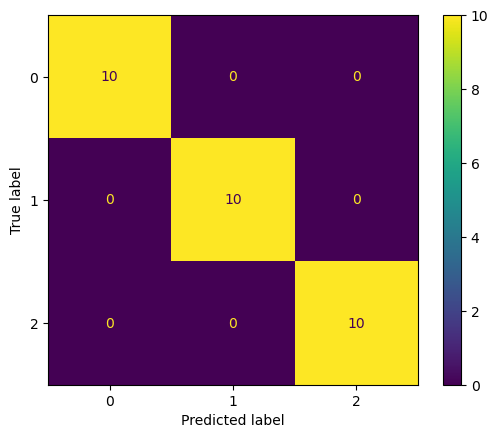

In [24]:
# Now look at predictions and calculate confusion matrix
print (y_pred)
cm = confusion_matrix(y_test, y_pred)

#we can plot it

plot_confusion_matrix(clf,X_test, y_test)

What if we wanted to predict how well did the model do for the training data? What about for the validation data? 

In [25]:

#collect predictions on train data
y_hat = clf.predict(X_train)

accuracy = accuracy_score(y_train, y_hat)
print("Best parameter Accuracy:",round(accuracy,2))

Best parameter Accuracy: 0.99


In [26]:

#collect predictions on validation data
y_hat = clf.predict(X_val)

accuracy = accuracy_score(y_val, y_hat)
print("Best parameter Accuracy:",round(accuracy,2))

Best parameter Accuracy: 0.92


## Suport Vector Machines

Now we look at a different time of model, a SVM.  There are a number of different options in scikit_learn.  Let us first explore the different decision boundaries they may produce.  In this case the authors of the code have provided us with functions to make the plots for the decision boundaries.  We are still doing this for illustrative purposes usign only 2 dimensions of the data.   See the original example here https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py

Automatically created module for IPython interactive environment
<class 'numpy.ndarray'>
(96, 2)


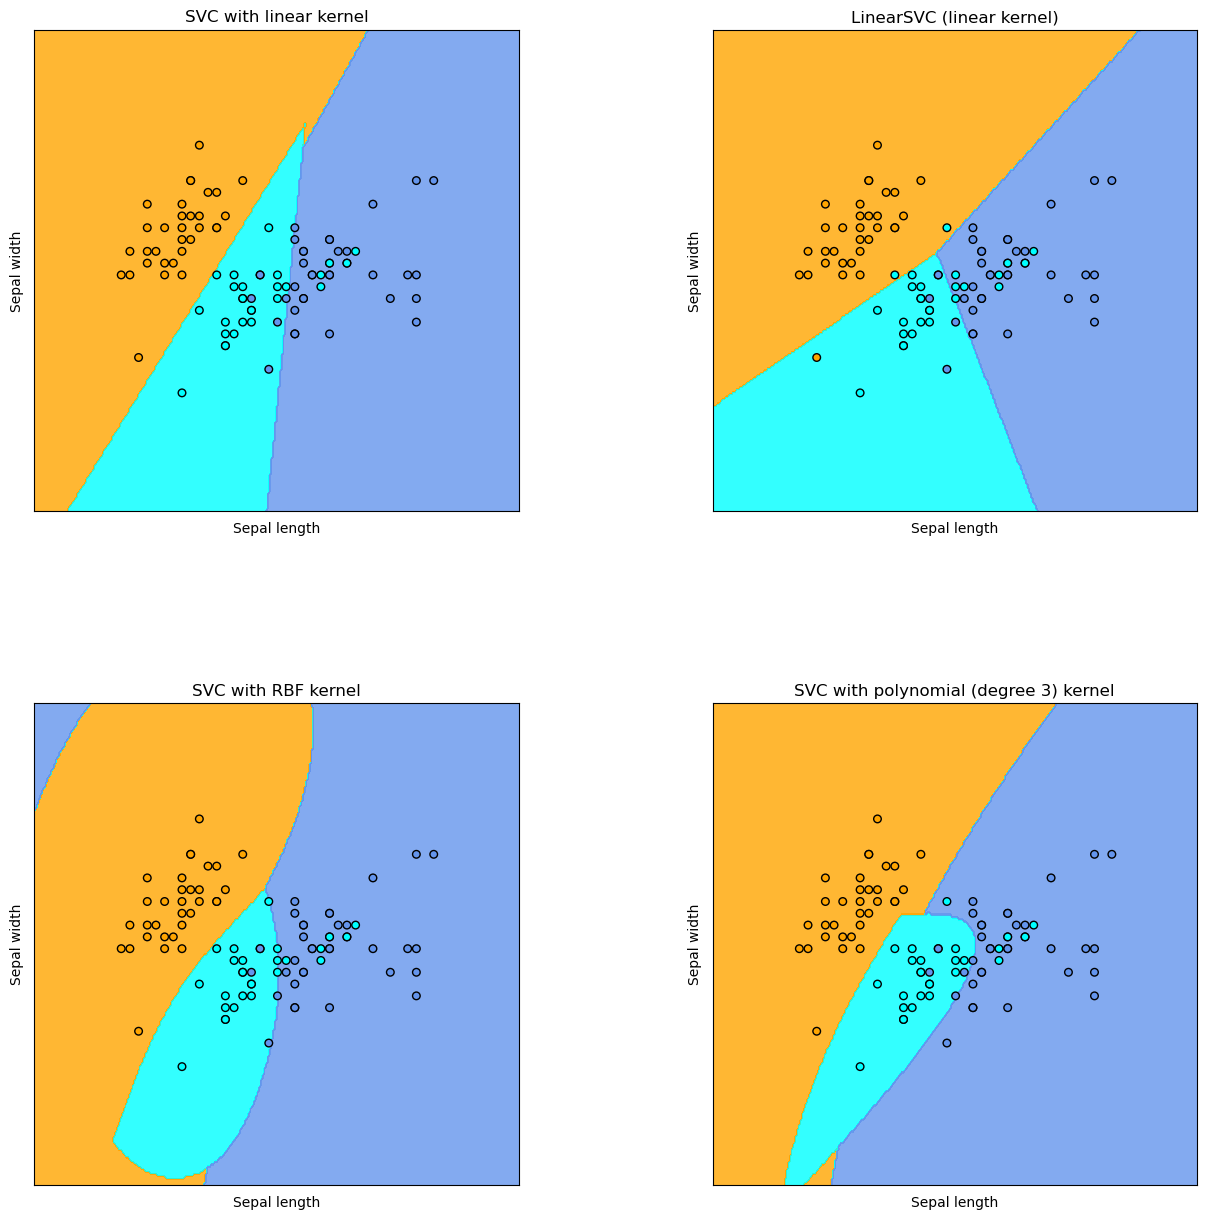

In [27]:
print(__doc__)
from sklearn import svm


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    
    return out

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
# import some data to play with

X = X_train.to_numpy()
X= X[:, :2]
y = y_train
print (type(X))
print(X.shape)
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')
    
# Set-up 2x2 grid for plotting.
#plt.figure(figsize=(8, 6))
fig, sub = plt.subplots(2, 2,figsize=(15,15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=cmap_light, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=cmap_light, s=30, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)


plt.show()

Ok, so now let us do some hyperparameter optimisation for an SVC model.  This would give us a good set of parameters for our data. We then obtain the various metrics out of the classification report and also the confusion matrix for this classfier. 

Best parameters found: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Results on the test set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 1 0 0 1 1]


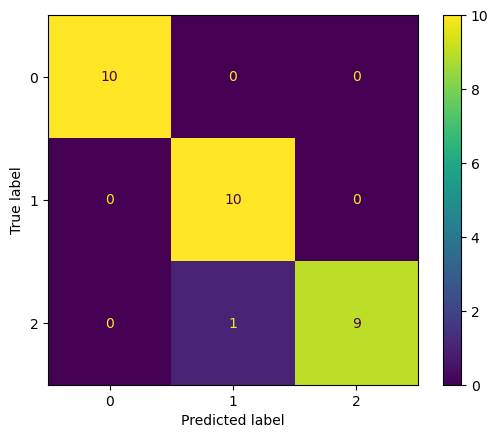

In [28]:
from sklearn.svm import SVC 
# defining parameter range 
parameters = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
clf = GridSearchCV(SVC(), parameters, refit = True) 
  
# fitting the model for grid search 
clf.fit(X_train, y_train) 


#here we can see the best parameter was for n_neighbors
print("Best parameters found:",clf.best_params_)

y_true, y_pred = y_test , clf.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

print (y_pred)
cm = confusion_matrix(y_test, y_pred)

#we can plot it

plot_confusion_matrix(clf,X_test, y_test)


We can even convert the plots above so each shows one of our models so far, in terms of their decision boundaries.  That way we can compare the kNN, SVC, and two versions of the MlP (basic and hypertuned). 

In [29]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


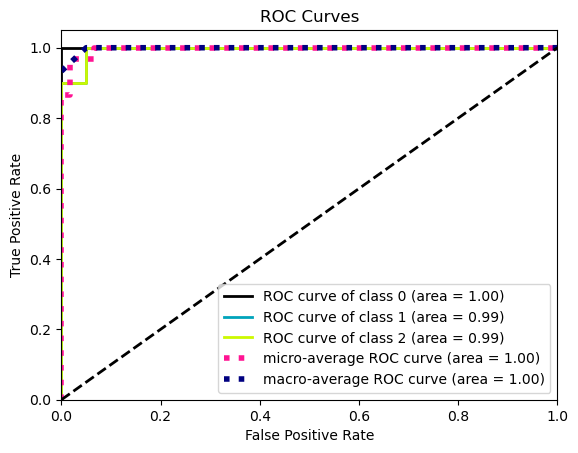

In [30]:
import scikitplot as skplt
from sklearn.metrics import plot_roc_curve

clf=SVC(C= 1, gamma= 0.1, kernel= 'rbf',probability=True)
# fitting the model 
clf.fit(X_train, y_train) 
y_true, y_pred = y_test , clf.predict(X_test)
y_probas = clf.predict_proba(X_test)
#print (y_probas)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()


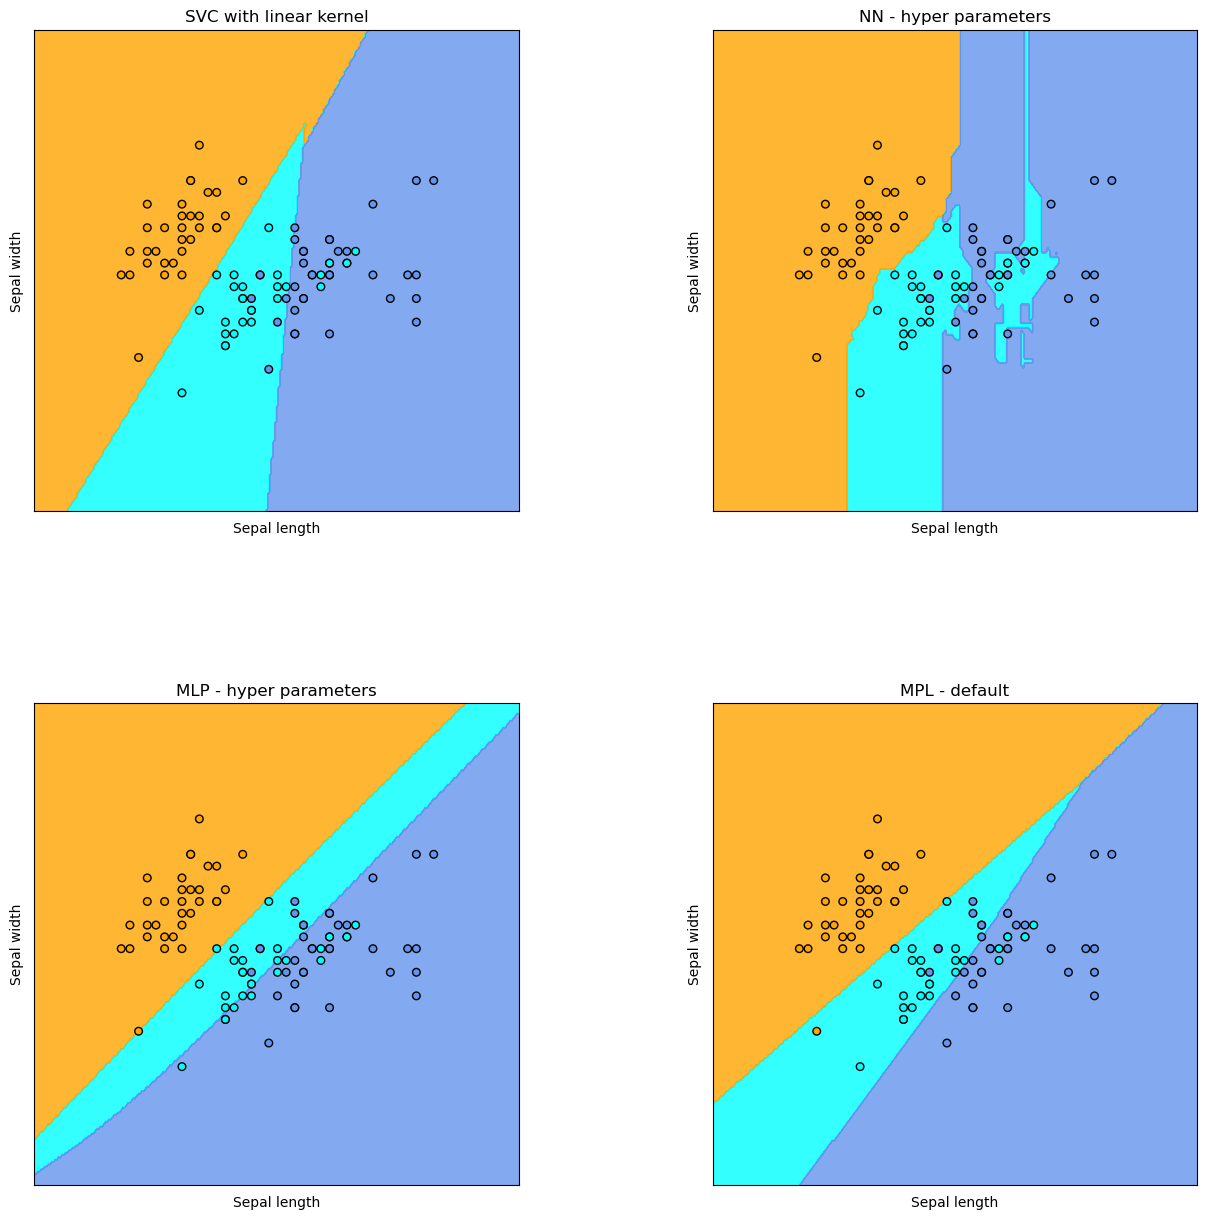

In [31]:
models = (svm.SVC(kernel='linear', C=C),
          KNeighborsClassifier(algorithm='ball_tree',n_neighbors =4, p= 1, weights='uniform'),
          MLPClassifier(random_state=1, max_iter=300,hidden_layer_sizes=(50,50,50),activation= 'tanh',
    solver= 'sgd',alpha= 0.0001,learning_rate='constant'),
          MLPClassifier(random_state=1, max_iter=300))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'NN - hyper parameters',
          'MLP - hyper parameters',
          'MPL - default')
    
# Set-up 2x2 grid for plotting.
#plt.figure(figsize=(8, 6))
fig, sub = plt.subplots(2, 2,figsize=(15,15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=cmap_light, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=cmap_light, s=30, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)


plt.show()

## Classification comparison 

We can also compare some of the accuracies so far obtained for the different classifers.  Below we use the standard algorithms (basic parameters) for illustrative purposes and then we combined the fine tuned algorithm versions also. 

In the example belows, the 10-fold cross validation procedure is used to evaluate each algorithm, importantly configured with the same random seed to ensure that the same splits to the training data are performed and that each algorithms is evaluated in precisely the same way.  Running the example provides a list of each algorithm short name, the mean accuracy and the standard deviation accuracy.The example also provides a box and whisker plot showing the spread of the accuracy scores across each cross validation fold for each algorithm.

KNN-H: 0.771111 (0.108775)
SVM-H: 0.802222 (0.125983)
MLP-H: 0.788889 (0.109545)
KNN: 0.842222 (0.071802)
SVM: 0.822222 (0.096864)
MLP: 0.740000 (0.065772)


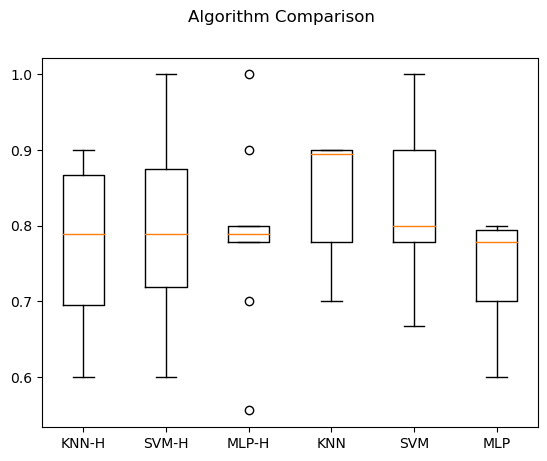

In [32]:
from sklearn import model_selection
models =[]
models.append (('KNN-H',KNeighborsClassifier(algorithm='ball_tree',n_neighbors =4, p= 1, weights='uniform')))
models.append(('SVM-H',SVC(C= 1, gamma= 0.1, kernel= 'rbf')))
models.append(('MLP-H', MLPClassifier(max_iter=300,hidden_layer_sizes=(50,50,50),activation= 'tanh',
    solver= 'sgd',alpha= 0.0001,learning_rate='constant')))
models.append (('KNN',KNeighborsClassifier()))
models.append(('SVM',SVC()))
models.append(('MLP', MLPClassifier()))
#print (models)
results = []
names = []
scoring = 'accuracy'
for name,model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score (model, X,y, cv=kfold, scoring = scoring )
        results.append(cv_results)
        names.append(name)
        msg="%s: %f (%f)" % (name, cv_results.mean(),cv_results.std())
        print(msg)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot (111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()